# MDP

- Monte carlo
- Q learining
- Sarsa
- Values iteration
- Dyna Q
- Dyna +

In [336]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import random


class Environment:
    def __init__(self, width, height, start, terminal, num_blocks):
        # Environment variables 
        self.width = width
        self.height = height
        self.start = start
        self.terminal = terminal
        self.grid = np.zeros((height * width))  # Create an empty grid
        self.num_blocks = num_blocks
        
        
        # policy variables
        self.values = np.zeros((width * height))  # Values for each cell
        self.actions = 0.25 * np.ones((width * height, 4))  # Actions probability vectors for each cell
        
    def LocToState(self,loc):
        x,y = loc
        return self.width * x + y
    
    def StateToLoc(self,state):
        x = state//self.width
        y = state - x * self.width
        return x,y
    
    def generate_blocks(self):
        self.grid[self.start] = 1
        self.grid[self.terminal] = 2
        self.blocked = []
    
        # Generate random block positions
        for _ in range(self.num_blocks):
            blocked_state = random.randint(0, self.height * self.width - 1)
            if blocked_state != self.start and blocked_state != self.terminal:
                self.grid[blocked_state] = -1
                self.blocked.append(blocked_state)
    
    def plot_grid(self):
        # Define custom colors for each value
        colors = ['black', 'white', 'blue', 'red']  # Colors for values -1, 0, 1, 2

        # Create a custom colormap
        cmap = ListedColormap(colors)
       
        # plt.imshow(self.grid, cmap=cmap, interpolation='nearest')
        mat_grid = self.grid.reshape((self.width, self.height))
        plt.pcolor(mat_grid, cmap=cmap, edgecolors='k')
        
        # Add markers for start and terminal points
        x_start,y_start = StateToLoc(self.start)
        x_terminal,y_terminal = StateToLoc(self.terminal)
        plt.text(y_start + 0.5, x_start + 0.5, 'S', color='white', fontsize=12, ha='center', va='center')
        plt.text(y_terminal + 0.5, x_terminal + 0.5, 'T', color='white', fontsize=12, ha='center', va='center')
    
        # plt.colorbar()
        plt.title('Grid')
        plt.show()
    
    def plot_policy(self):
        # Define custom colors for each value
        colors = ['black', 'white', 'blue', 'red']  # Colors for values -1, 0, 1, 2

        # Create a custom colormap
        cmap = ListedColormap(colors)
       
        # plt.imshow(self.grid, cmap=cmap, interpolation='nearest')
        mat_grid = self.grid.reshape((self.height,self.width ))
        plt.pcolor(mat_grid, cmap=cmap, edgecolors='k')
        
        # Add markers for start and terminal points
        x_start,y_start = StateToLoc(self.start)
        x_terminal,y_terminal = StateToLoc(self.terminal)
        plt.text(y_start + 0.5, x_start + 0.5, 'S', color='white', fontsize=12, ha='center', va='center')
        plt.text(y_terminal + 0.5, x_terminal + 0.5, 'T', color='white', fontsize=12, ha='center', va='center')
        
        offsets = [(.65, .5), (0.5, 0.65), (0.35, 0.5), (0.5, 0.35)]  # Up, Right, Down, Left
        direction = [(1,0),(0,1),(-1,0),(0,-1)]
        
        for state in range(self.width * self.height):
            if state != self.terminal and state not in self.blocked:
                x,y = StateToLoc(state)
                for a, offset in enumerate(offsets):
                    arrow_length = self.actions[state][a]*0.25  # Get the action probability for the current action
                    if arrow_length >0:
                        plt.arrow(x + offset[0], y + offset[1],  # Start position
                                      arrow_length*direction[a][0], arrow_length*direction[a][1],  # Arrow length scaled by probability
                                      color='k', alpha=0.5, head_width=0.1, head_length=0.1)  # Arrow properties
                if state != self.start:
                    plt.text(x + 0.5, y + 0.5, f'{self.values[state]:.2f}', color='black', fontsize=8, ha='center', va='center')
            
        # for x in range(self.width):
        #     for y in range(self.height):
        #         if (x,y) != self.terminal:
        #             for a, offset in enumerate(offsets):
        #                 arrow_length = self.actions[x][y][a]*0.25  # Get the action probability for the current action
        #                 if arrow_length >0:
        #                     plt.arrow(x + offset[0], y + offset[1],  # Start position
        #                               arrow_length*direction[a][0], arrow_length*direction[a][1],  # Arrow length scaled by probability
        #                               color='k', alpha=0.5, head_width=0.1, head_length=0.1)  # Arrow properties
        #             if (x,y) != self.start:
        #                 plt.text(x + 0.5, y + 0.5, f'{self.values[x][y]:.2f}', color='black', fontsize=8, ha='center', va='center')
        # plt.colorbar()
        plt.title('Grid')
        plt.show()
        

        
def initialize():
    width = 4
    height = 6
    start = 0
    terminal = width*height-1
    num_blocks = 4  # Number of random blocks
    grid_mdp = Environment(width, height, start, terminal, num_blocks)
    grid_mdp.generate_blocks()
    grid_mdp.plot_grid()
    grid_mdp.plot_policy()

    return grid_mdp
    


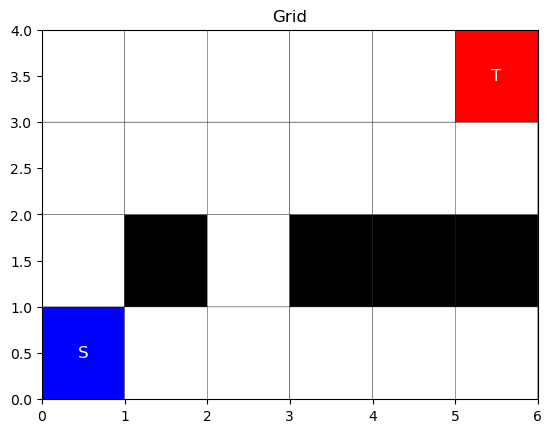

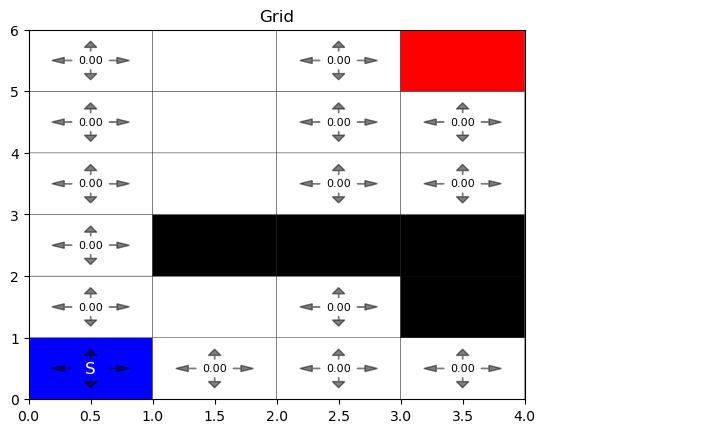

In [337]:
# Example usage:
grid_mdp= initialize()

In [299]:
grid_mdp.terminal

15

In [254]:
def Monte_Carlo(self):
    y = list(range(self.width - 1)).remove(self.start[1]).remove(self.terminal[1])
    x = list(range(self.height -1)).remove(self.start[1]).remove(self.terminal[1])
    print(f' x = {x}, y = {y}')

Environment.Monte_Carlo = Monte_Carlo

In [308]:
w = 6
h = 4
def LocToState(loc):
        x,y = loc
        return w * x + y
    
def StateToLoc(state):
    x = state//w
    y = state - x * w
    return (x,y)

In [266]:
LocToState((5,3))

33

In [310]:
StateToLoc(6*4-1)

(3, 5)